In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
from typing import List, Union
from BouchardSornett import *
import seaborn as sns

## Question I

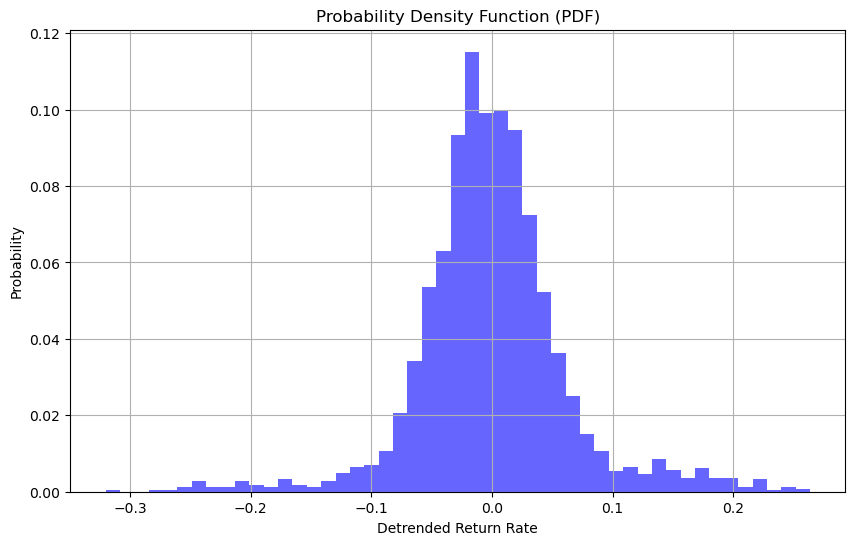

-0.314382    0.000411
-0.302463    0.000000
-0.290544    0.000000
-0.278625    0.000411
-0.266706    0.000411
-0.254788    0.001234
-0.242869    0.002878
-0.230950    0.001234
-0.219031    0.001234
-0.207112    0.002878
-0.195193    0.001645
-0.183274    0.001234
-0.171355    0.003289
-0.159436    0.001645
-0.147517    0.001234
-0.135598    0.002878
-0.123679    0.004934
-0.111760    0.006579
-0.099841    0.006990
-0.087922    0.010691
-0.076003    0.020559
-0.064085    0.034128
-0.052166    0.053454
-0.040247    0.062911
-0.028328    0.093339
-0.016409    0.115132
-0.004490    0.099095
 0.007429    0.099507
 0.019348    0.094572
 0.031267    0.072368
 0.043186    0.052220
 0.055105    0.036184
 0.067024    0.025082
 0.078943    0.015214
 0.090862    0.010691
 0.102781    0.005345
 0.114699    0.006579
 0.126618    0.004523
 0.138537    0.008635
 0.150456    0.005757
 0.162375    0.003701
 0.174294    0.006168
 0.186213    0.003701
 0.198132    0.003701
 0.210051    0.001234
 0.221970 

In [2]:
# 读取并清理数据
df_cleaned = pd.read_csv(
    "data.csv"
)  # 请确保文件路径正确，data.csv 为包含日期和收盘价的文件
df_cleaned = df_cleaned[["date", "close"]].dropna()  # 保留所需的列并移除空值
df_cleaned["close"] = df_cleaned["close"].astype(float)  # 确保价格数据为浮点数
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])  # 将日期列转换为日期类型
df_cleaned = df_cleaned.sort_values("date")  # 按日期排序

# 使用清理后的数据进行初始化
SZ_option_pricing = BouchardSornettOptionPricing(df_cleaned)
# 定义初始股价 (S0) 和行权价格范围 (X_range)
S0 = df_cleaned["close"].iloc[-1]  # 数据集中的最后一个收盘价作为 S0
X_range = np.linspace(S0 * 0.9, S0 * 1.08, 100)  
SZ_option_pricing.calculate_pdf(ifplot=True,interval=21)

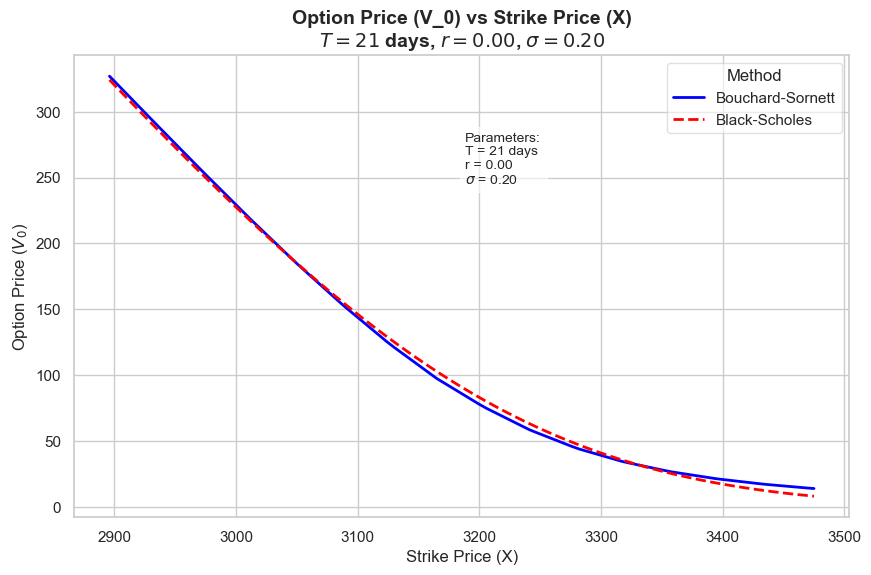

In [3]:



# 使用 Bouchard-Sornett 方法计算期权价格
option_prices_bs = SZ_option_pricing.price_option(S0, X_range)

# Black-Scholes 参数
T = 21 / 252  # 21天到期时间，转换为年
r = 0.00  # 无风险利率
sigma = 0.2  # 假设年化波动率

# 使用 Black-Scholes 方法计算期权价格
bs_option_prices = [
    SZ_option_pricing.black_scholes(S0, X, T, r, sigma) for X in X_range
]

# 设置Seaborn的主题和风格
sns.set_theme(style="whitegrid")  # 白色网格背景

# 绘制两种方法的期权价格对比图
plt.figure(figsize=(10, 6), dpi=100)

# 绘制Bouchard-Sornett方法计算的期权价格曲线
sns.lineplot(x=X_range, y=option_prices_bs, label="Bouchard-Sornett", color="blue",  linewidth=2)

# 绘制Black-Scholes方法计算的期权价格曲线
sns.lineplot(x=X_range, y=bs_option_prices, label="Black-Scholes", color="red", linestyle="--", linewidth=2)

# 设置图表标题和标签
plt.title(
    "Option Price (V_0) vs Strike Price (X)\n"
    + f"$T={T*252:.0f}$ days, $r={r:.2f}$, $\sigma={sigma:.2f}$",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Strike Price (X)", fontsize=12)
plt.ylabel("Option Price ($V_0$)", fontsize=12)

# 显示网格
plt.grid(True)

# 显示图例
plt.legend(title="Method", loc="best", frameon=True, fancybox=True, framealpha=0.6)

# 在图表上标注参数值
plt.text(
    X_range[len(X_range) // 2],  # X轴位置（图表中间）
    max(option_prices_bs) * 0.75,  # Y轴位置
    f"Parameters:\nT = {T*252:.0f} days\nr = {r:.2f}\n$\sigma$ = {sigma:.2f}",
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.6),  # 半透明背景框
)

# 显示最终图表
plt.show()

## Question II

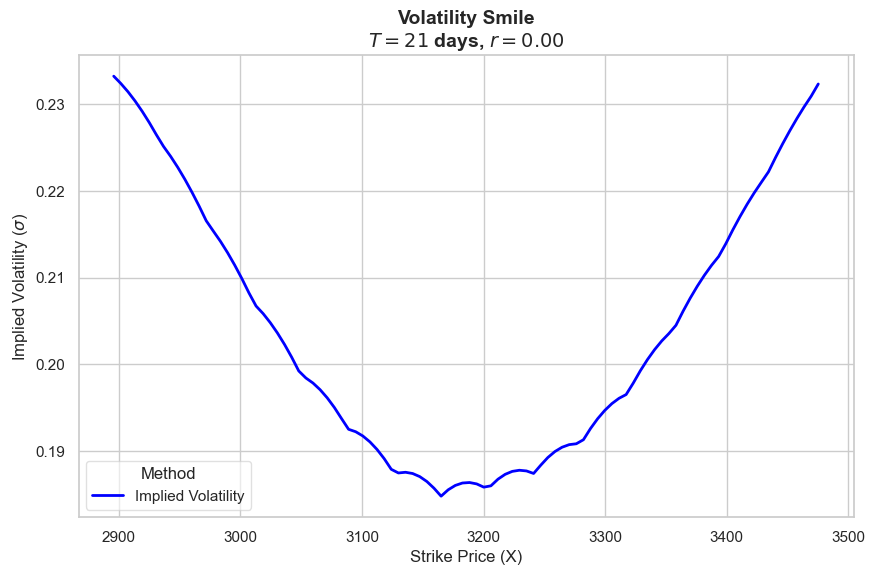

In [4]:
implied_volatilities=SZ_option_pricing.implied_volatility(S0,X_range,T,r)

# 设置Seaborn主题和样式
sns.set_theme(style="whitegrid")  # 选择白色网格背景
plt.figure(figsize=(10, 6), dpi=100)  # 设置图片大小和分辨率

# 绘制隐含波动率曲线
sns.lineplot(x=X_range, y=implied_volatilities, label="Implied Volatility", color="blue",  linewidth=2)

# 图表标题和标签
plt.title("Volatility Smile\n" + f"$T={T*252:.0f}$ days, $r={r:.2f}$", fontsize=14, weight='bold')
plt.xlabel("Strike Price (X)", fontsize=12)
plt.ylabel("Implied Volatility ($\sigma$)", fontsize=12)

# 设置图例
plt.legend(title="Method", loc="best", frameon=True, fancybox=True, framealpha=0.6)

# 显示图表
plt.show()

In [5]:
SZ_option_pricing.detrended.std()

0.06264145559108523